# Salary Predictions Based on Job Descriptions

# Part 1 - DEFINE

### ---- 1 Define the problem ----

Salary Predictions

In [1]:
#import your libraries
import pandas as pd
import numpy as np
import sklearn as sk
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats
#etc

#your info here
#__author__ = "your name here"
#__email__ = "your email here"

## Part 2 - DISCOVER

### ---- 2 Load the data ----

In [2]:
#load the data into a Pandas dataframe
features = pd.read_csv('train_features.csv')
target = pd.read_csv('train_salaries.csv')


### ---- 3 Clean the data ----

In [3]:
#look for duplicate data, invalid data (e.g. salaries <=0), or corrupt data and remove it
features.isnull().sum()
features.shape

(1000000, 8)

In [4]:
target.isnull().sum()
target.shape

(1000000, 2)

In [5]:
listoffeatures = ['companyId', 'jobType', 'degree', 'major', 'industry','yearsExperience']
for i in listoffeatures:
    a = features[i].unique()
    print(a)

['COMP37' 'COMP19' 'COMP52' 'COMP38' 'COMP7' 'COMP15' 'COMP24' 'COMP20'
 'COMP41' 'COMP56' 'COMP4' 'COMP54' 'COMP57' 'COMP14' 'COMP61' 'COMP58'
 'COMP3' 'COMP44' 'COMP30' 'COMP27' 'COMP34' 'COMP11' 'COMP31' 'COMP49'
 'COMP0' 'COMP1' 'COMP36' 'COMP47' 'COMP8' 'COMP42' 'COMP50' 'COMP53'
 'COMP48' 'COMP45' 'COMP46' 'COMP2' 'COMP5' 'COMP55' 'COMP29' 'COMP40'
 'COMP33' 'COMP22' 'COMP12' 'COMP25' 'COMP6' 'COMP23' 'COMP17' 'COMP28'
 'COMP21' 'COMP26' 'COMP43' 'COMP51' 'COMP10' 'COMP59' 'COMP13' 'COMP39'
 'COMP16' 'COMP9' 'COMP32' 'COMP62' 'COMP35' 'COMP18' 'COMP60']
['CFO' 'CEO' 'VICE_PRESIDENT' 'MANAGER' 'JUNIOR' 'JANITOR' 'CTO' 'SENIOR']
['MASTERS' 'HIGH_SCHOOL' 'DOCTORAL' 'BACHELORS' 'NONE']
['MATH' 'NONE' 'PHYSICS' 'CHEMISTRY' 'COMPSCI' 'BIOLOGY' 'LITERATURE'
 'BUSINESS' 'ENGINEERING']
['HEALTH' 'WEB' 'AUTO' 'FINANCE' 'EDUCATION' 'OIL' 'SERVICE']
[10  3  8  2 23  9  1 17 24  7 21 13 11 14 18 20 12 15 22  0 19  5  4 16
  6]


In [6]:
filterdf = features['degree'] == 'NONE'
filterdf.shape

(1000000,)

In [7]:
jobTypedf = features[filterdf]
jobTypedf.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
6,JOB1362684407693,COMP15,CFO,NONE,NONE,HEALTH,23,24
12,JOB1362684407699,COMP4,JUNIOR,NONE,NONE,OIL,8,29
14,JOB1362684407701,COMP57,JANITOR,NONE,NONE,AUTO,21,81
20,JOB1362684407707,COMP44,JANITOR,NONE,NONE,SERVICE,11,96
21,JOB1362684407708,COMP20,JUNIOR,NONE,NONE,AUTO,14,62


(array([2.45200e+03, 6.55490e+04, 1.99948e+05, 2.99777e+05, 2.46632e+05,
        1.27603e+05, 4.52460e+04, 1.10070e+04, 1.65700e+03, 1.29000e+02]),
 array([  0. ,  30.1,  60.2,  90.3, 120.4, 150.5, 180.6, 210.7, 240.8,
        270.9, 301. ]),
 <a list of 10 Patch objects>)

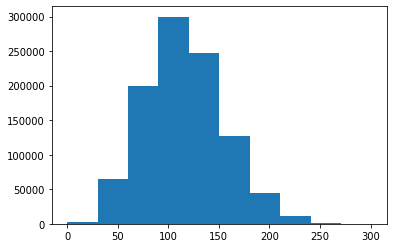

In [8]:
plt.hist(target['salary'])

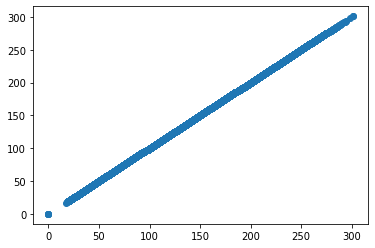

In [9]:
plt.scatter(target['salary'],target['salary'])

There's a zero salary row

In [10]:
zeroSalary = target['salary'] == 0
zeroSalary.shape

(1000000,)

In [11]:
zeroSalarydf = target[zeroSalary]
zeroSalarydf

,jobId,salary
30559,JOB1362684438246,0
495984,JOB1362684903671,0
652076,JOB1362685059763,0
816129,JOB1362685223816,0
828156,JOB1362685235843,0


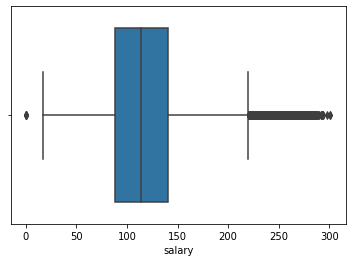

In [12]:
sns.boxplot(target['salary'])

In [13]:
z = np.abs(stats.zscore(target['salary']))
print(np.where(z > 3))

(array([   560,    670,    966, ..., 998446, 999670, 999893], dtype=int64),)


In [14]:
z[999893]

3.1235714961313983

In [15]:
merge = pd.merge(features, target, left_on='jobId', right_on='jobId')


In [16]:
features_target = merge[merge.salary != 0]
outliers = merge[merge.salary == 0]


In [17]:
for col in features_target.columns:
    print( col ,':', len(features_target[col].unique()))

jobId : 999995
companyId : 63
jobType : 8
degree : 5
major : 9
industry : 7
yearsExperience : 25
milesFromMetropolis : 100
salary : 279


In [18]:
training_data = features_target.drop('jobId',axis=1)

### ---- 4 Explore the data (EDA) ----

In [ ]:
#summarize each feature variable
#summarize the target variable
#look for correlation between each feature and the target
#look for correlation between features

In [19]:
features_target[features_target.columns[1:]].corr()['salary'][:]

yearsExperience        0.375013
milesFromMetropolis   -0.297686
salary                 1.000000
Name: salary, dtype: float64

In [20]:
degree = pd.DataFrame(features_target.groupby(['degree']).mean().salary)


In [21]:
features_target.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


In [22]:

def bar_graph(feat):
    for feature in feat:
        dim = (11, 6)
        fig, ax = plt.subplots(figsize=dim)
        degree = features_target.groupby([feature]).mean().salary.reset_index(name='income')
        sns.barplot(x=degree[feature],y= degree['income'])

        plt.show()

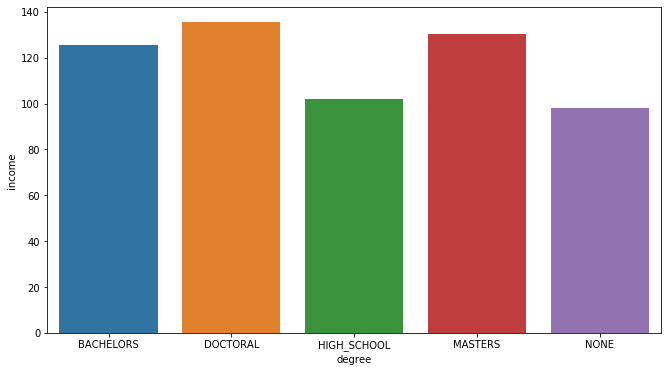

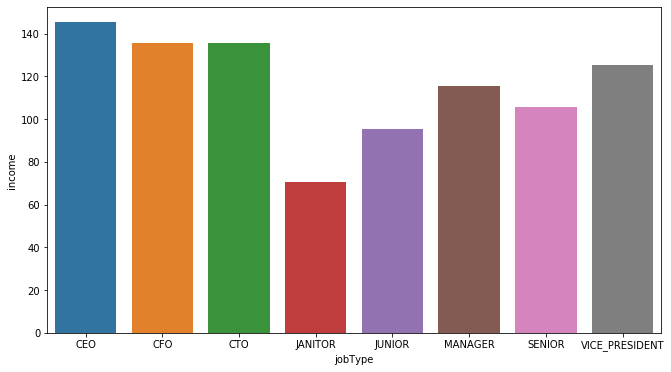

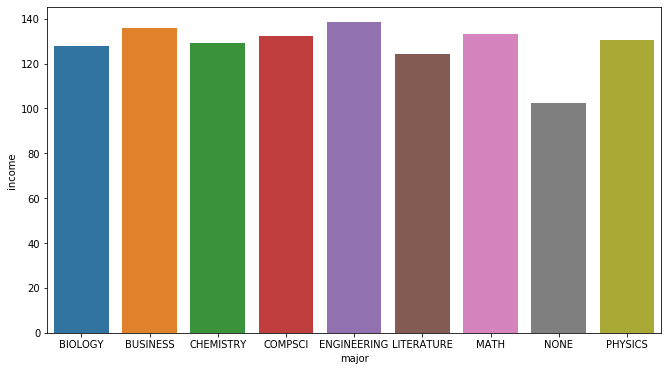

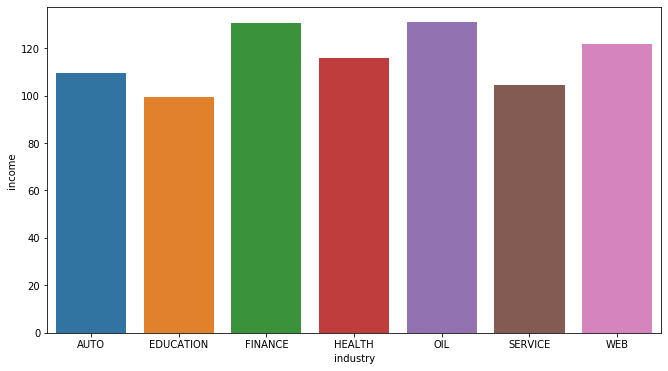

In [23]:
feat = ['degree','jobType','major','industry']
bar_graph(feat)

In [24]:
def box_plot(feat):
    for col in feat:
        dim = (11, 6)
        fig, ax = plt.subplots(figsize=dim)
        sns.boxplot(x=col,y= 'salary', data=features_target.sort_values('salary'))
        plt.show()

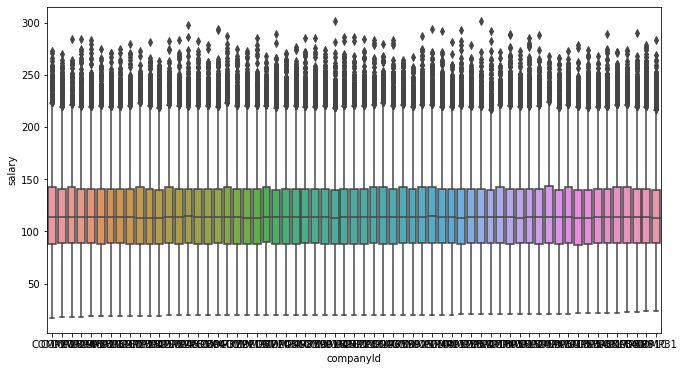

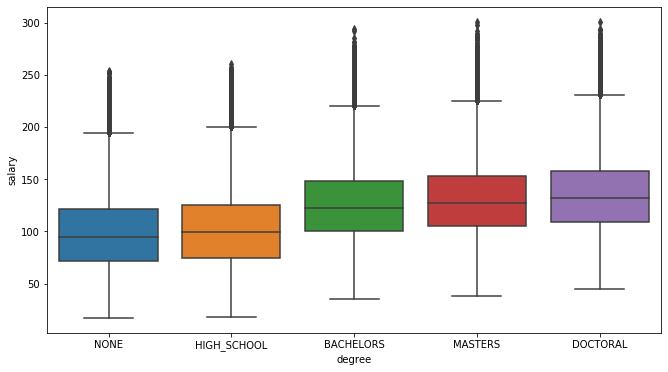

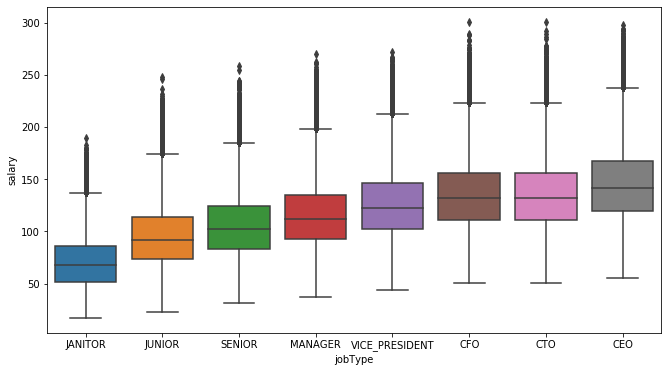

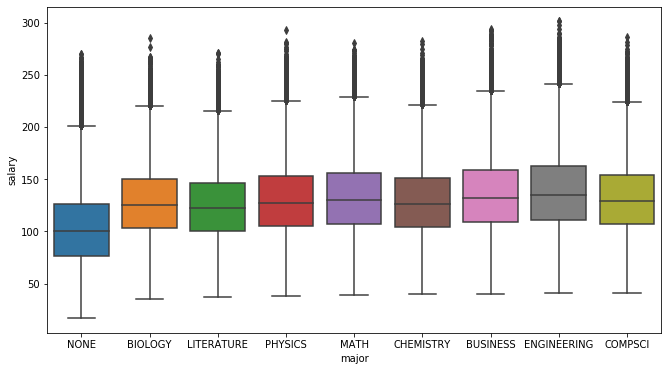

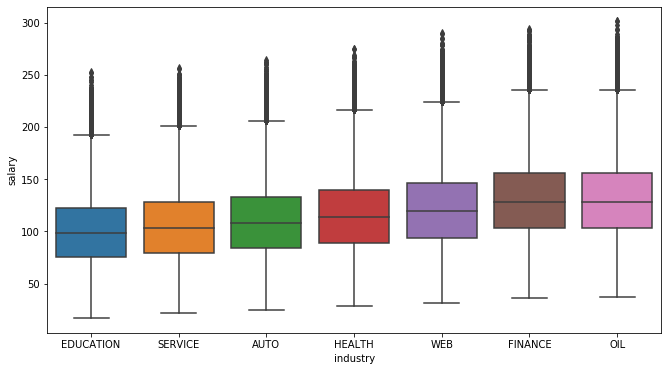

In [25]:
feat = ['companyId','degree','jobType','major','industry']
box_plot(feat)

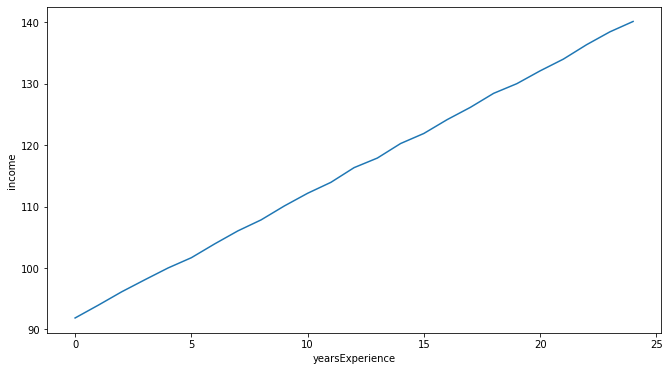

In [26]:
dim = (11,6)
fig, ax = plt.subplots(figsize=dim)
experience = features_target.groupby(['yearsExperience']).mean().salary.reset_index(name = 'income')
sns.lineplot(x=experience['yearsExperience'],y=experience['income'] )

In [27]:
training_data.shape

(999995, 8)

In [28]:
def build_heat_map(col1,col2):
    df_gptest = training_data[[col1,col2,'salary']]
    grouped_test1 = df_gptest.groupby([col1,col2],as_index=False).mean()
    grouped_pivot = grouped_test1.pivot(index=col1,columns=col2)
    grouped_pivot = grouped_pivot.fillna(0)
    fig, ax = plt.subplots()
    im = ax.pcolor(grouped_pivot, cmap='seismic')
    row_labels = grouped_pivot.columns.levels[1]
    col_labels = grouped_pivot.index
    ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
    ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)    
    ax.set_xticklabels(row_labels, minor=False)
    ax.set_yticklabels(col_labels, minor=False)
    fig.colorbar(im)
    plt.xticks(rotation=90)


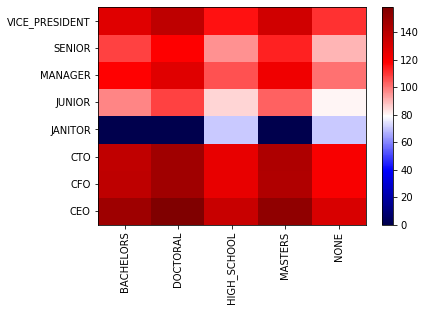

In [29]:
build_heat_map('jobType','degree')


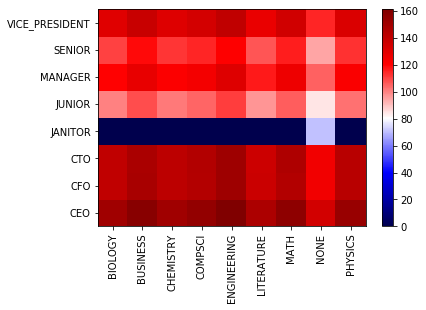

In [30]:
build_heat_map('jobType','major')


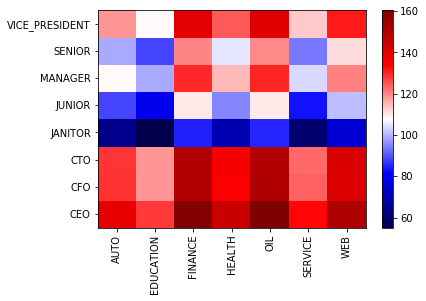

In [31]:
build_heat_map('jobType','industry')


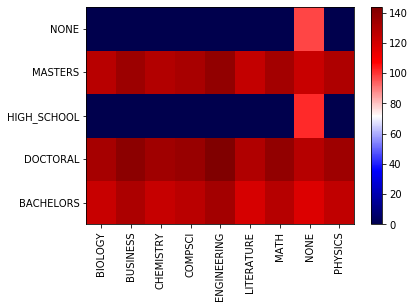

In [32]:
build_heat_map('degree','major')


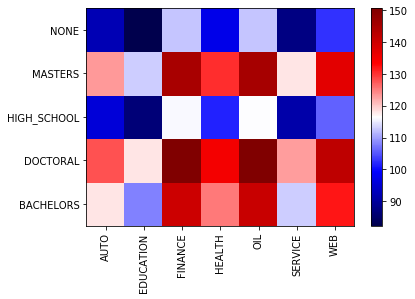

In [33]:
build_heat_map('degree','industry')


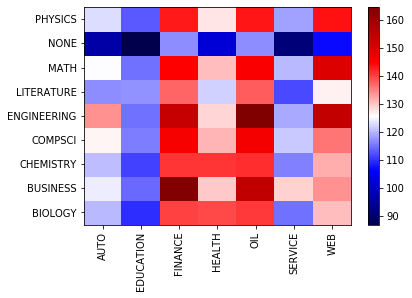

In [34]:
build_heat_map('major','industry')


### ---- 5 Establish a baseline ----

In [35]:
#select a reasonable metric (MSE in this case)
#create an extremely simple model and measure its efficacy
#e.g. use "average salary" for each industry as your model and then measure MSE
#during 5-fold cross-validation

In [36]:
#a = pd.DataFrame(features_target.groupby(['industry']).mean().salary.reset_index(name = 'income_industry'))
#a.loc[a['industry'] == 'AUTO' , 'income_industry']
#a[a.industry=='AUTO'].income_industry.item()

income_industry = features_target.groupby('industry')['salary'].mean().to_dict()
income_industry

{'AUTO': 109.43522152496485,
 'EDUCATION': 99.44838571898697,
 'FINANCE': 130.747658645164,
 'HEALTH': 115.7355399110364,
 'OIL': 130.95386285634237,
 'SERVICE': 104.44682029458984,
 'WEB': 121.6453615446388}

In [38]:
training_data_cpy = training_data.copy()
training_data_cpy['industry_averageSalary'] = ''
for index in range(len(training_data_cpy)):
    training_data_cpy['industry_averageSalary'].values[index]=income_industry[training_data_cpy['industry'].values[index]]
final = training_data_cpy

In [39]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

In [40]:
kf = KFold(n_splits=5, random_state=1, shuffle=True)

In [41]:
mse_values = []
for train, test in kf.split(final):
    values = mean_squared_error(final['salary'].values[train],final['industry_averageSalary'].values[train])
    mse_values.append(values)
mean_mse = np.mean(mse_values)

In [42]:
mean_mse

1367.1229507852556

### ---- 6 Hypothesize solution ----

In [ ]:
#brainstorm 3 models that you think may improve results over the baseline model based
#on your 




Brainstorm 3 models that you think may improve results over the baseline model based on your EDA and explain why they're reasonable solutions here.

Also write down any new features that you think you should try adding to the model based on your EDA, e.g. interaction variables, summary statistics for each group, etc

## Part 3 - DEVELOP

You will cycle through creating features, tuning models, and training/validing models (steps 7-9) until you've reached your efficacy goal

#### Your metric will be MSE and your goal is:
 - <360 for entry-level data science roles
 - <320 for senior data science roles

### ---- 7 Engineer features  ----

In [ ]:
#since company id has no variance we can ignore the column

In [43]:
training_data.head()

,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


In [44]:
#make sure that data is ready for modeling
#create any new features needed to potentially enhance model


def feat_encode(dataframe):
    cat_feat = ['jobType','degree','major','industry']
    num_feat = dataframe[['yearsExperience','milesFromMetropolis']]
    
    category_var = pd.get_dummies(dataframe[cat_feat])
        
    dataframe.drop(cat_feat,axis=1,inplace=True)
    return pd.concat([category_var,num_feat],axis=1)





In [45]:
df_features = feat_encode(training_data)
df_target = training_data['salary']

In [46]:
from sklearn.model_selection import cross_val_score


In [74]:
def mse_calc(model):
    mean_mse = cross_val_score(model,df_features, df_target,cv=5,scoring='neg_mean_squared_error')
    print('MSE:',np.mean(mean_mse))

In [51]:
nans = lambda df: df[df.isnull().any(axis=1)]
nans(df_features)

,jobType_CEO,jobType_CFO,jobType_CTO,jobType_JANITOR,jobType_JUNIOR,jobType_MANAGER,jobType_SENIOR,jobType_VICE_PRESIDENT,degree_BACHELORS,degree_DOCTORAL,...,major_PHYSICS,industry_AUTO,industry_EDUCATION,industry_FINANCE,industry_HEALTH,industry_OIL,industry_SERVICE,industry_WEB,yearsExperience,milesFromMetropolis


### ---- 8 Create models ----

# Multiple Linear Regression

In [49]:
#create and tune the models that you brainstormed during part 2
from sklearn.linear_model import LinearRegression


In [50]:
MlinearRegression = LinearRegression()

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_features, df_target, test_size=0.3,random_state=42)


In [60]:
from sklearn.preprocessing import StandardScaler

In [62]:
scaler = StandardScaler()

In [63]:
scaler.fit(X_train)
scaler.fit(X_test)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [64]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [71]:
X_train

array([[-3.77071946e-01, -3.78523656e-01, -3.79392199e-01, ...,
        -4.08370531e-01, -3.48979188e-04, -1.33438036e+00],
       [-3.77071946e-01, -3.78523656e-01, -3.79392199e-01, ...,
        -4.08370531e-01, -3.48979188e-04, -5.38069158e-01],
       [-3.77071946e-01, -3.78523656e-01, -3.79392199e-01, ...,
        -4.08370531e-01,  5.55053712e-01,  8.12197665e-01],
       ...,
       [-3.77071946e-01, -3.78523656e-01, -3.79392199e-01, ...,
        -4.08370531e-01,  8.32755058e-01, -2.61091348e-01],
       [-3.77071946e-01, -3.78523656e-01, -3.79392199e-01, ...,
        -4.08370531e-01, -9.72303689e-01, -9.18913647e-01],
       [-3.77071946e-01, -3.78523656e-01, -3.79392199e-01, ...,
        -4.08370531e-01,  2.77352366e-01,  1.01993102e+00]])

In [65]:
MlinearRegression.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [66]:
pred = MlinearRegression.predict(X_test)


In [67]:
def predict_plot(test,predict):
    plt.figure(figsize=(17, 8))

    ax1 = sns.distplot(test, hist=False, color="r", label="Actual Values")
    sns.distplot(predict, hist=False, color="b", label="Predicted Values" , ax=ax1)

    plt.title('Actual vs Predicted Values for Salary')
    plt.xlabel('Salary')
    plt.ylabel('Proportion of job postings')

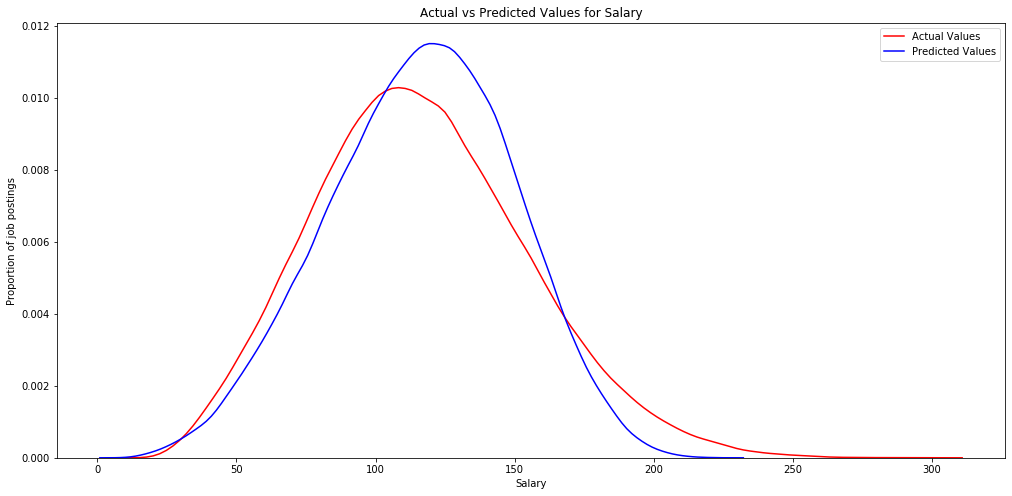

In [68]:
predict_plot(y_test, pred)


In [76]:
MlinearRegression.score(X_train,y_train)

0.7436924298940151

In [75]:
mse_calc(MlinearRegression)


MSE: -384.41543441998914


# Random Forest

In [78]:
from sklearn.ensemble import RandomForestRegressor

In [86]:
rfr = RandomForestRegressor(n_estimators=50,max_depth=25, min_samples_split=60,max_features='auto',n_jobs=-1)

In [87]:
rfr.fit(X_train,y_train)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=25,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=60,
                      min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
                      oob_score=False, random_state=None, verbose=0,
                      warm_start=False)

In [88]:
rfr_pred =rfr.predict(X_test)

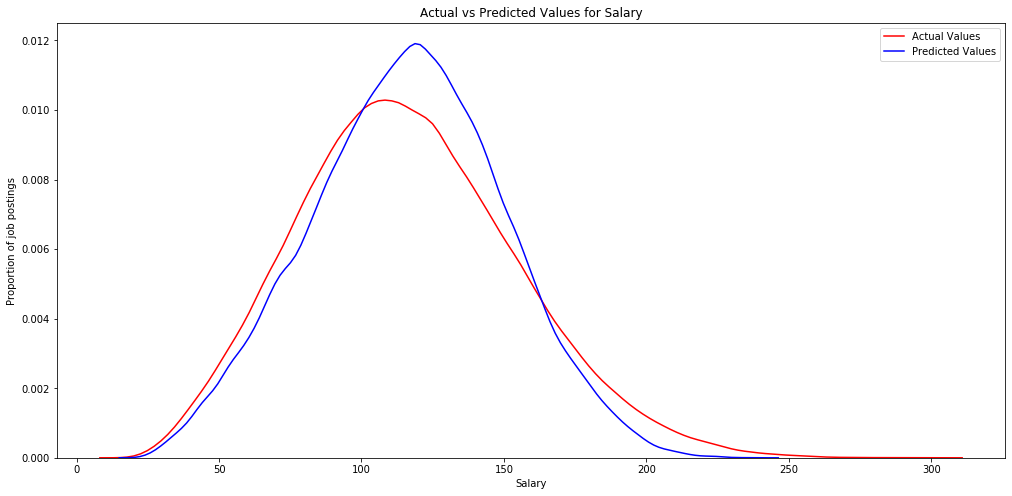

In [89]:
predict_plot(y_test, rfr_pred)


In [90]:
mse_calc(rfr)


MSE: -366.2974474415059


### ---- 9 Test models ----

In [ ]:
#do 5-fold cross validation on models and measure MSE

### ---- 10 Select best model  ----

In [ ]:
#select the model with the lowest error as your "prodcuction" model

## Part 4 - DEPLOY

### ---- 11 Automate pipeline ----

In [ ]:
#write script that trains model on entire training set, saves model to disk,
#and scores the "test" dataset

### ---- 12 Deploy solution ----

In [ ]:
#save your prediction to a csv file or optionally save them as a table in a SQL database
#additionally, you want to save a visualization and summary of your prediction and feature importances
#these visualizations and summaries will be extremely useful to business stakeholders

### ---- 13 Measure efficacy ----

We'll skip this step since we don't have the outcomes for the test data